Table of Contents
=================

1. [Lesson Introduction](#Lesson-Introduction)
2. [Jupyter Notebook](#Jupyter-Notebook)
3. [Working With a Notebook](#Working-With-a-Notebook)
   - [Python 2 vs Python 3](#Python-2-vs-Python-3)

In [80]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import os
import sys
import warnings
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Get the current working directory (the directory of the running script)
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, "NLP_Functions")))
from NLP_Functions.Preprocessing_Functions import Preprocessing, TextProcessingPipeline

sys.path.append(os.path.abspath(os.path.join(current_dir, "Classification_Functions")))
from Classification_Functions.Classification_Metrics_Functions import Metrics
from Classification_Functions.Preprocessing_Functions import Preprocessing

In [81]:
# Load dataset
columns_to_load = ['SAT','MTranslation2']
doc = pd.read_csv("Data/Intel_Website_Reviews_2018_2021.csv", usecols=columns_to_load, low_memory=False)
doc = doc.dropna(subset=["MTranslation2"])
doc = doc.dropna(subset=["SAT"])

doc.info()
doc.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 52385 entries, 0 to 52856
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SAT            52385 non-null  object
 1   MTranslation2  52385 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


,SAT,MTranslation2
0,Satisfied,"they were persistent in achieving the task, wh..."
1,Satisfied,Hope to print After-sale service information o...
2,Satisfied,Our support staff was very courteous. The with...


In [82]:
# Initialize pipeline
pipeline = TextProcessingPipeline(doc, text_column="MTranslation2")

# Run the pipeline
processed_df = pipeline.process()

doc.info()
processed_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 52385 entries, 0 to 52856
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SAT                      52385 non-null  object
 1   MTranslation2            52385 non-null  object
 2   processed_MTranslation2  52385 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


,SAT,MTranslation2,processed_MTranslation2
0,Satisfied,"they were persistent in achieving the task, wh...",persistent achieve task helpfuleven busy sched...
1,Satisfied,Hope to print After-sale service information o...,hope print aftersale service information product
2,Satisfied,Our support staff was very courteous. The with...,support staff courteous withdrawal defective p...


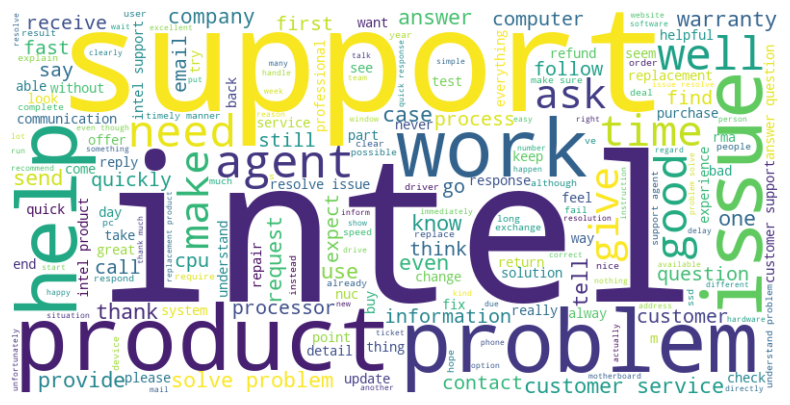

In [83]:
text = " ".join(doc["processed_MTranslation2"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

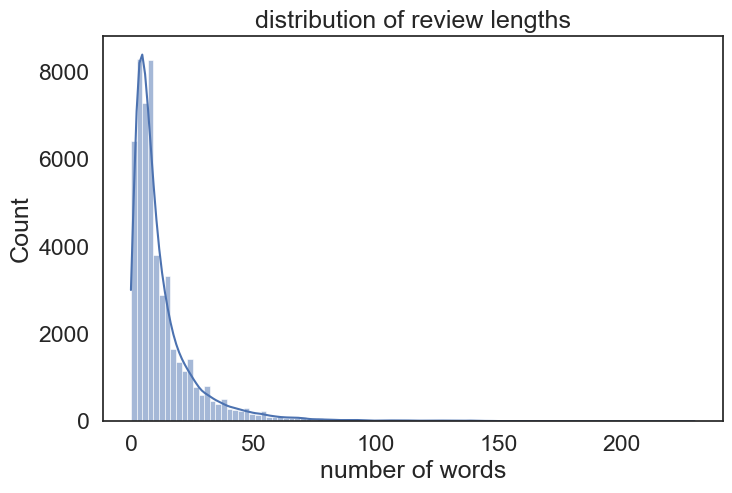

count    52385.000000
mean        13.005364
std         15.860791
min          0.000000
25%          4.000000
50%          8.000000
75%         15.000000
max        230.000000
Name: review_length, dtype: float64




In [84]:
doc["review_length"] = doc["processed_MTranslation2"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(doc["review_length"], bins=100, kde=True)
plt.xlabel("number of words")
plt.ylabel("Count")
plt.title("distribution of review lengths")
plt.show()

print(doc['review_length'].describe())
print('\n')

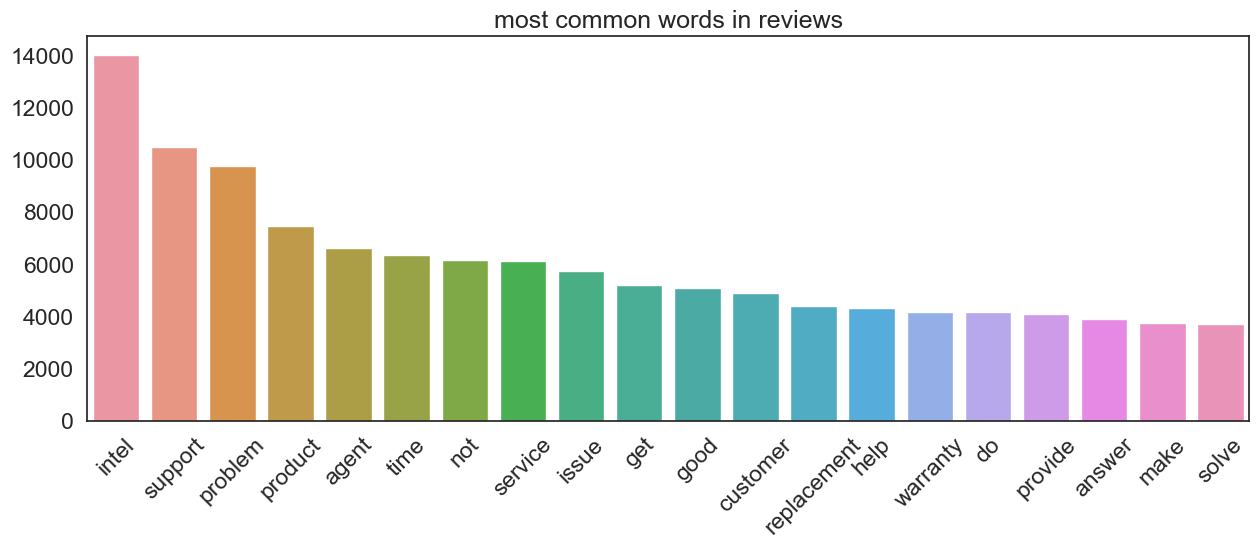

In [89]:
doc = doc.loc[doc['review_length'] != 0]
all_words = " ".join(doc["processed_MTranslation2"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

plt.figure(figsize=(15,5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("most common words in reviews")
plt.show()

In [90]:
doc['SAT_Target'] = (doc['SAT'] != 'Satisfied').astype(int)

doc.info()
doc.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 52087 entries, 0 to 52856
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SAT                      52087 non-null  object
 1   MTranslation2            52087 non-null  object
 2   processed_MTranslation2  52087 non-null  object
 3   review_length            52087 non-null  int64 
 4   SAT_Target               52087 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 2.2+ MB


,SAT,MTranslation2,processed_MTranslation2,review_length,SAT_Target
0,Satisfied,"they were persistent in achieving the task, wh...",persistent achieve task helpfuleven busy sched...,13,0
1,Satisfied,Hope to print After-sale service information o...,hope print aftersale service information product,6,0
2,Satisfied,Our support staff was very courteous. The with...,support staff courteous withdrawal defective p...,31,0


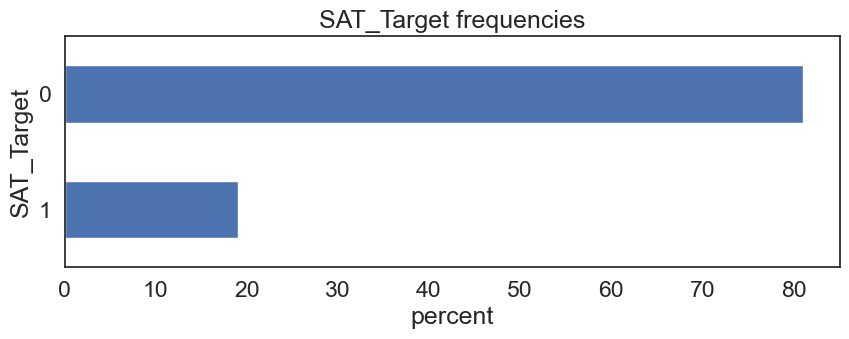

Satified: 80.77%
Not Satified: 19.23%


In [91]:
# Retaine missed_playoffs in a separate data frame
target_df = doc[['SAT_Target']].astype(str)

# missed_playoffs frequency
Preprocessing.cat_univariate_freq(
    df = target_df, 
    length = 3, 
    width = 10, 
    col_start = 0, 
    col_end = 1, 
    font = 1.5
)

# calculate the averages accross both classifications
not_satisfied_avg = round(doc['SAT_Target'].sum()/len(doc['SAT_Target'])*100,2)
satified_avg = round((len(doc['SAT_Target']) - doc['SAT_Target'].sum())/len(doc['SAT_Target'])*100,2)

print(f'Satified: {satified_avg}%')
print(f'Not Satified: {not_satisfied_avg}%')

In [92]:
doc = doc.loc[doc['review_length']>15].reset_index(drop=True)

doc.info()
doc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13035 entries, 0 to 13034
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SAT                      13035 non-null  object
 1   MTranslation2            13035 non-null  object
 2   processed_MTranslation2  13035 non-null  object
 3   review_length            13035 non-null  int64 
 4   SAT_Target               13035 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 458.4+ KB


,SAT,MTranslation2,processed_MTranslation2,review_length,SAT_Target
0,Satisfied,Our support staff was very courteous. The with...,support staff courteous withdrawal defective p...,31,0
1,Satisfied,It's actually easy to chip production & proces...,actually easy chip production processor know h...,26,0
2,Satisfied,Take into account the first message sent to th...,take account first message send helpdesk repea...,16,0
3,Satisfied,Intel and Nuhr did well in servicing me. I t...,intel nuhr well servicing think one thing coul...,16,0
4,Satisfied,Improve the technical level and product profic...,improve technical level product proficiency 80...,42,0


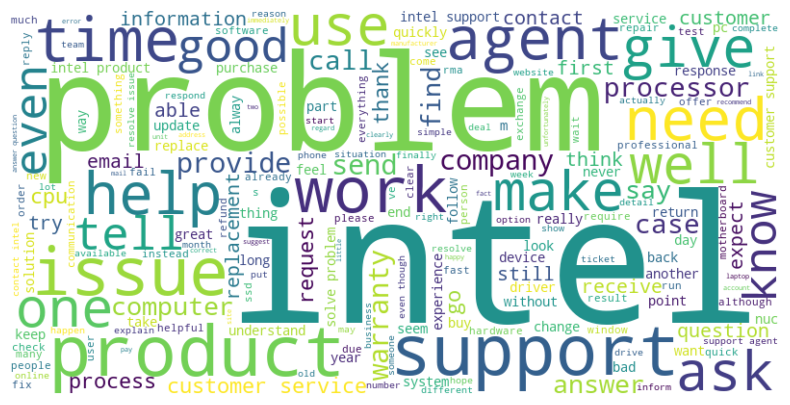

In [93]:
text = " ".join(doc["processed_MTranslation2"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

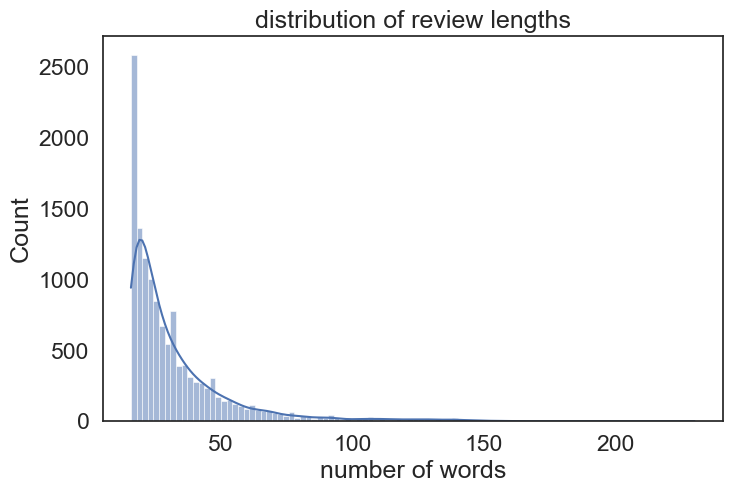

count    13035.000000
mean        32.737783
std         21.157131
min         16.000000
25%         19.000000
50%         25.000000
75%         38.000000
max        230.000000
Name: review_length, dtype: float64




In [94]:
doc["review_length"] = doc["processed_MTranslation2"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(doc["review_length"], bins=100, kde=True)
plt.xlabel("number of words")
plt.ylabel("Count")
plt.title("distribution of review lengths")
plt.show()

print(doc['review_length'].describe())
print('\n')

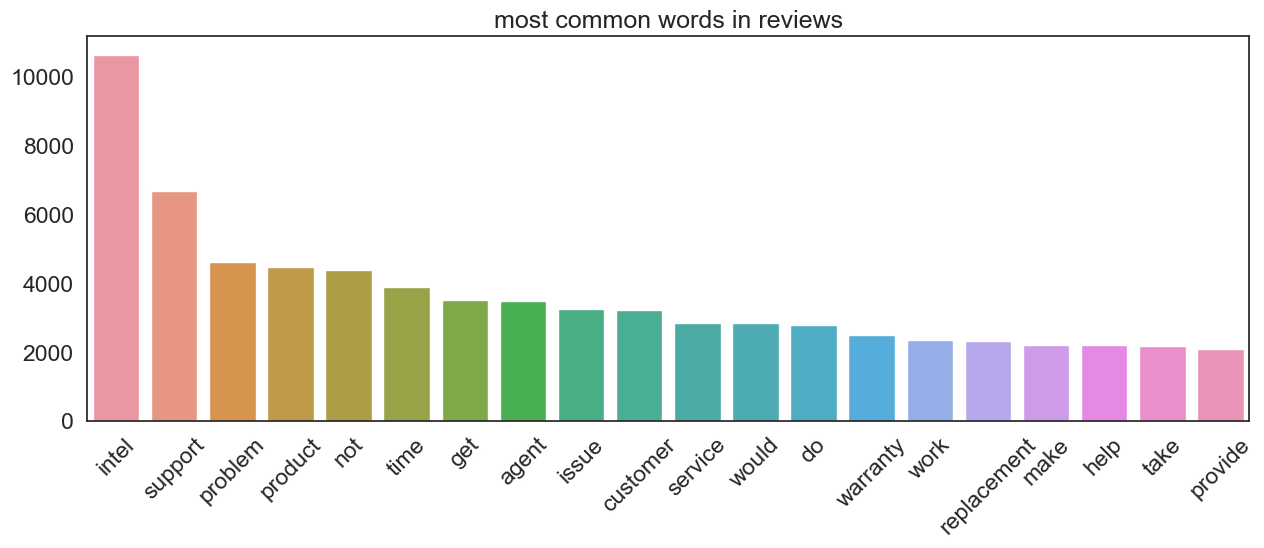

In [96]:
all_words = " ".join(doc["processed_MTranslation2"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

plt.figure(figsize=(15,5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("most common words in reviews")
plt.show()

In [98]:
doc['SAT_Target'] = (doc['SAT'] != 'Satisfied').astype(int)

doc.info()
doc.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13035 entries, 0 to 13034
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SAT                      13035 non-null  object
 1   MTranslation2            13035 non-null  object
 2   processed_MTranslation2  13035 non-null  object
 3   review_length            13035 non-null  int64 
 4   SAT_Target               13035 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 458.4+ KB


,SAT,MTranslation2,processed_MTranslation2,review_length,SAT_Target
0,Satisfied,Our support staff was very courteous. The with...,support staff courteous withdrawal defective p...,31,0
1,Satisfied,It's actually easy to chip production & proces...,actually easy chip production processor know h...,26,0
2,Satisfied,Take into account the first message sent to th...,take account first message send helpdesk repea...,16,0


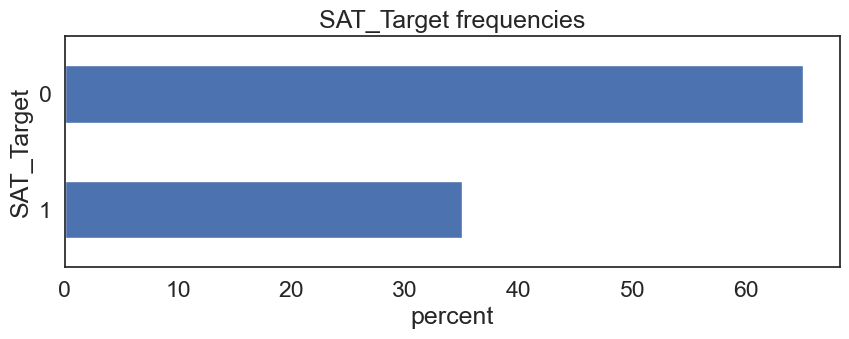

Satified: 65.12%
Not Satified: 34.88%


In [99]:
# Retaine missed_playoffs in a separate data frame
target_df = doc[['SAT_Target']].astype(str)

# missed_playoffs frequency
Preprocessing.cat_univariate_freq(
    df = target_df, 
    length = 3, 
    width = 10, 
    col_start = 0, 
    col_end = 1, 
    font = 1.5
)

# calculate the averages accross both classifications
not_satisfied_avg = round(doc['SAT_Target'].sum()/len(doc['SAT_Target'])*100,2)
satified_avg = round((len(doc['SAT_Target']) - doc['SAT_Target'].sum())/len(doc['SAT_Target'])*100,2)

print(f'Satified: {satified_avg}%')
print(f'Not Satified: {not_satisfied_avg}%')

In [100]:
doc.to_csv('Preprocessed_Data/Preprocessed_Data.csv', index=False)